Problem 1

# IMAGE CLASSIFICATION USING KERAS

### Import necessary modules

In [1]:
## Checking the hardware
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1627011495800775737
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3159333273
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16042912491909982578
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [1]:
# Modules to ignore warnings
import warnings               
warnings.filterwarnings('ignore')

# Modules required for the task
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
import os   
import shutil
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import call

In [2]:
from keras.models import Sequential, Model, load_model
from keras.layers import *
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.inception_v3 import InceptionV3
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.utils import to_categorical

Using TensorFlow backend.


# Reading Data

# Splitting data into train and test

In [16]:
import os
import glob
source = "D:\\INSOFE\Material\\MODULE4_AI & DECISION SCIENCES\\CUTe4\\ImageClassification\\10_categories"
dest_train = "D:\\INSOFE\Material\\MODULE4_AI & DECISION SCIENCES\\CUTe4\\ImageClassification\\train_data"
dest_val = "D:\\INSOFE\Material\\MODULE4_AI & DECISION SCIENCES\\CUTe4\\ImageClassification\\val_data"
#subfolders = os.listdir(source)
for subfolder in glob.glob(source + '\\*'):
    print(subfolder.split('\\')[-1])
    if not os.path.exists(dest_val + '\\' + subfolder.split('\\')[-1]):
        os.mkdir(dest_val + '\\' + subfolder.split('\\')[-1])
    if not os.path.exists(dest_val + '\\' + subfolder.split('\\')[-1]):
        os.mkdir(dest_val + '\\' + subfolder.split('\\')[-1])

    for file in glob.glob(subfolder + '\\*'):
        if np.random.rand(1) < 0.2:
            #shutil.copy(source1 + '/'+ f, dest11 + '/'+ f)
            shutil.copy(file, dest_val + '\\' + subfolder.split('\\')[-1])
        else:
            shutil.copy(file, dest_train + '\\' + subfolder.split('\\')[-1])

airplanes
BACKGROUND_Google
bonsai
car_side
Faces
Faces_easy
grand_piano
Leopards
Motorbikes
watch


In [32]:
train_path = '10_categories/train'   # Train data path
val_path = '10_categories/val'       # Validation data path
classes = os.listdir(train_path)    # List of directories in train path
print(classes)

['Airplanes', 'BACKGROUND_Google', 'Bonsai', 'Car_side', 'Faces', 'Faces_easy', 'Grand_piano', 'Leopards', 'Motorbikes', 'Watch']


In [33]:
pd.DataFrame(classes)

,0
0,Airplanes
1,BACKGROUND_Google
2,Bonsai
3,Car_side
4,Faces
5,Faces_easy
6,Grand_piano
7,Leopards
8,Motorbikes
9,Watch


In [34]:
## Checking the no of images in train folder
for category in classes:
    temp = '{}'.format(category) #, len(os.listdir(os.path.join(train_path, category))))
    temp
    print('{} {}'.format(category, len(os.listdir(os.path.join(train_path, category)))))

Airplanes 640
BACKGROUND_Google 374
Bonsai 102
Car_side 98
Faces 348
Faces_easy 348
Grand_piano 79
Leopards 160
Motorbikes 638
Watch 191


In [35]:
## Checking the no of images in test folder
for category in classes:
    temp = '{}'.format(category) #, len(os.listdir(os.path.join(train_path, category))))
    temp
    print('{} {}'.format(category, len(os.listdir(os.path.join(val_path, category)))))

Airplanes 160
BACKGROUND_Google 94
Bonsai 26
Car_side 25
Faces 87
Faces_easy 87
Grand_piano 20
Leopards 40
Motorbikes 160
Watch 48


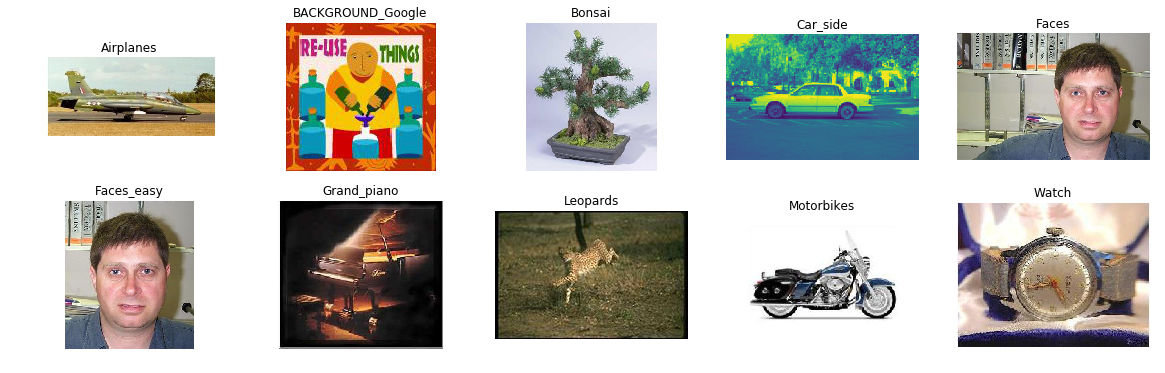

In [36]:
# Plot a sample image from each category

plt.figure(figsize=(20,6))
for ix,i in enumerate(classes):
    f = os.listdir(os.path.join(train_path,i))[0]
    img = mpimg.imread(os.path.join(train_path,i,f))
    plt.subplot(2,5,ix+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
   

# Image Augmentation

In [37]:
# Import ImageDataGenerator for image preprocessing/augmentation
# This basically creates multiple copies of train images by jittering(adding noise). 
# This includes rotating, zooming in, flipping, shifting, etc.

datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        shear_range=0.3,
        zoom_range=0.3,
        horizontal_flip=True,
        fill_mode='nearest') # 'nearest' is kind of algorithm to fill pixel values while transformation

In [38]:
# Create a directory named 'preview' to save augmented images.
aug_images_path = 'preview'
f = os.listdir(os.path.join(train_path,classes[1]))[10]
img_path = os.path.join(train_path,classes[1],f)
img = load_img(img_path)       # this is a PIL image
x = img_to_array(img)          # this is a Numpy array with shape (480, 640, 3)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 480, 640, 3)

 
# Delete, if already exists
if os.path.isdir(aug_images_path):
#     os.system('rm -rf '+aug_images_path)
    shutil.rmtree(aug_images_path)
    
os.system('mkdir '+aug_images_path)
    
# the .flow() command below generates augmented images and saves them to a directory names 'preview'
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir=aug_images_path, save_prefix='c0', save_format='jpg'):
    i += 1
    if i > 9:
        break  # otherwise the generator would loop indefinitely

Text(0.5, 1.0, 'Original Image: image_0014.jpg')

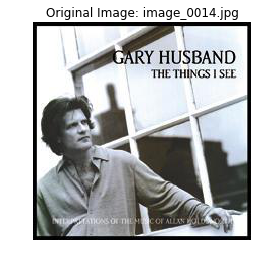

In [39]:
## Plotting the image which is to be augmented
plt.imshow(img)
plt.axis('off')
plt.title('Original Image: '+f)

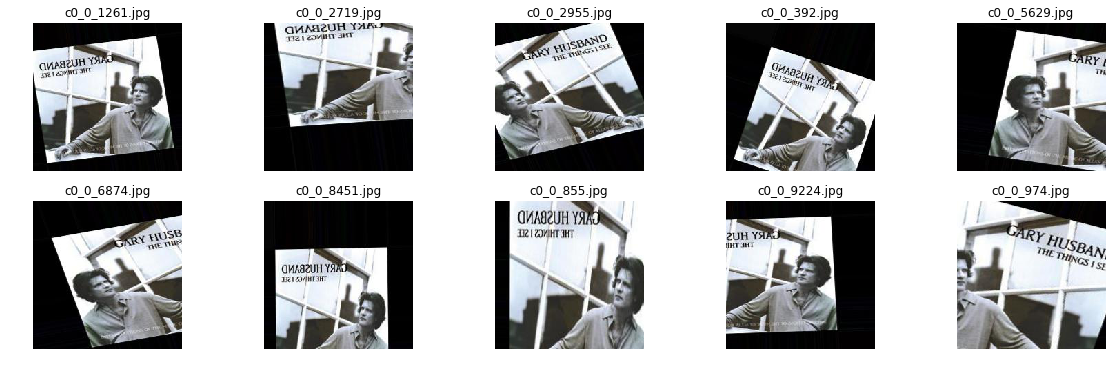

In [40]:
# Plot the augmented images for the above original image
# Read them from 'preview' directory and display them

plt.figure(figsize=(20,6))
aug_images = os.listdir('preview')
for ix,i in enumerate(aug_images):
    img = mpimg.imread(os.path.join('preview',i))
    plt.subplot(2,5,ix+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
    if ix==10:
        break

# Data Generator

In [41]:
# This is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(rescale=1/255.,
                                    rotation_range=20,
                                    height_shift_range=0.2,
                                    zoom_range=0.2)

# This is a generator that will read pictures found in subfolers of 'train', and generates
# batches of augmented image data on the fly
train_generator = train_datagen.flow_from_directory(directory=train_path, 
                                                    batch_size=64, 
                                                    class_mode='categorical', 
                                                    shuffle=True, 
                                                    target_size=(160,160))

Found 2977 images belonging to 10 classes.


In [42]:
# This is the augmentation configuration we will use for validation
val_datagen = ImageDataGenerator(rescale=1/255.)
val_generator = val_datagen.flow_from_directory(directory=val_path, 
                                                    batch_size=64, 
                                                    class_mode='categorical', 
                                                    shuffle=False, 
                                                    target_size=(160,160))

Found 747 images belonging to 10 classes.


In [43]:
val_generator.class_indices

{'Airplanes': 0,
 'BACKGROUND_Google': 1,
 'Bonsai': 2,
 'Car_side': 3,
 'Faces': 4,
 'Faces_easy': 5,
 'Grand_piano': 6,
 'Leopards': 7,
 'Motorbikes': 8,
 'Watch': 9}

# CNN for Image Classification

In [47]:
# Sequential is a container in keras which is used to stack layers in order
# First layer should include the input data shape. This is mandatory. 
# Padding valid implies no padding
# Padding SAME implies enough padding so that output has the same dimensions as input 
# Initial layers identify fewer basic features like edges while later layers identify a lot of more abstract features. 
# Therefore, no. of filters increase as we go deeper into the network. 
# Batchormalization is standard in convolution layers. Improves the convergence time.
# Activation is applied after the Batch normalization
# Dropout could be used for regularization in the fully-connected part of the network

def image_classifier(nb_classes):
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(5, 5), input_shape=(160, 160, 3), padding='valid'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='valid'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=128, kernel_size=(5, 5), padding='valid'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dropout(0.2))

    model.add(Dense(128, init='uniform', activation='relu'))
    model.add(Dropout(0.4))

    model.add(Dense(nb_classes, activation='softmax'))
    
    return(model)

In [48]:
# Cross Entropy is the standard loss function for classification tasks. 
# Adam is the most popular optimizer. Convergence is quick. Could be unstable sometimes. 
# Learning Rate Schedulers could be used for stabilizing training process
# The 'metrics' mentioned will be computed during run time. So that we can monitor the progress.

model = image_classifier(nb_classes=10)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [49]:
# model.fit returns the history of loss and metrics for train and validation datasets.

hist0 = model.fit_generator(train_generator,steps_per_epoch=10,validation_steps=5,
                           validation_data=val_generator, 
                           epochs=30).history

Epoch 1/30
10/10 [==============================] - 10s 989ms/step - loss: 8.7118 - acc: 0.3328 - val_loss: 13.8416 - val_acc: 0.1344
Epoch 2/30
10/10 [==============================] - 3s 292ms/step - loss: 8.8087 - acc: 0.4156 - val_loss: 9.4595 - val_acc: 0.4114
Epoch 3/30
10/10 [==============================] - 3s 314ms/step - loss: 8.1876 - acc: 0.4688 - val_loss: 15.8329 - val_acc: 0.0125
Epoch 4/30
10/10 [==============================] - 4s 414ms/step - loss: 8.4408 - acc: 0.4453 - val_loss: 7.4930 - val_acc: 0.5351
Epoch 5/30
10/10 [==============================] - 4s 393ms/step - loss: 7.7713 - acc: 0.4638 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 6/30
10/10 [==============================] - 5s 453ms/step - loss: 6.7671 - acc: 0.4938 - val_loss: 10.9879 - val_acc: 0.3156
Epoch 7/30
10/10 [==============================] - 5s 477ms/step - loss: 4.8171 - acc: 0.5047 - val_loss: 12.5498 - val_acc: 0.2074
Epoch 8/30
10/10 [==============================] - 5s 475ms/step 

# Transfer Learning

In [50]:
# Inception was trained on 299x299x3 size images. Therefore we'll use the same dimentions for out task.
# Nevertheless, in transfer learning, if we are importing only the convolution layers, we can resize the images to other resolutions as well
# Inception is a fairly big network. Hence we used batch size as 32. 
# If larger memory GPUs are available, bigger batch_size could be used.

train_datagen = ImageDataGenerator(rescale=1/255.,
                                    rotation_range=20,
                                    height_shift_range=0.2,
                                    zoom_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_path, 
                                                    batch_size=32, 
                                                    class_mode='categorical', 
                                                    shuffle=True, 
                                                    target_size=(160,160))

Found 2977 images belonging to 10 classes.


In [51]:
val_datagen = ImageDataGenerator(rescale=1/255.)
val_generator = train_datagen.flow_from_directory(directory=val_path, 
                                                    batch_size=32, 
                                                    class_mode='categorical', 
                                                    shuffle=False, 
                                                    target_size=(160,160))

Found 747 images belonging to 10 classes.


In [52]:
# Get Inception architecture from keras.applications
from keras.applications.inception_v3 import InceptionV3

def inception_tl(nb_classes, freez_wts):
    
    trained_model = InceptionV3(include_top=False,weights='imagenet')
    x = trained_model.output
    x = GlobalAveragePooling2D()(x)
    pred_inception= Dense(nb_classes,activation='softmax')(x)
    model = Model(inputs=trained_model.input,outputs=pred_inception)
    
    for layer in trained_model.layers:
        layer.trainable=(1-freez_wts)
    
    return(model)

In [53]:
model = inception_tl(nb_classes=10, freez_wts=False)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
hist1 = model.fit_generator(train_generator, steps_per_epoch=10,validation_steps=5,
                           validation_data=val_generator, 
                           epochs=30).history

Epoch 1/30
10/10 [==============================] - 23s 2s/step - loss: 0.9893 - acc: 0.6937 - val_loss: 1.5421 - val_acc: 0.5125
Epoch 2/30
10/10 [==============================] - 4s 424ms/step - loss: 0.7828 - acc: 0.8094 - val_loss: 3.8959 - val_acc: 0.3812
Epoch 3/30
10/10 [==============================] - 4s 416ms/step - loss: 0.6916 - acc: 0.7656 - val_loss: 1.3108 - val_acc: 0.6937
Epoch 4/30
10/10 [==============================] - 4s 426ms/step - loss: 0.4292 - acc: 0.9031 - val_loss: 0.6363 - val_acc: 0.8125
Epoch 5/30
10/10 [==============================] - 5s 475ms/step - loss: 0.5205 - acc: 0.8750 - val_loss: 0.6719 - val_acc: 0.7626
Epoch 6/30
10/10 [==============================] - 4s 415ms/step - loss: 0.5256 - acc: 0.8344 - val_loss: 0.5760 - val_acc: 0.9000
Epoch 7/30
10/10 [==============================] - 4s 419ms/step - loss: 0.3428 - acc: 0.8781 - val_loss: 4.4702 - val_acc: 0.4000
Epoch 8/30
10/10 [==============================] - 4s 414ms/step - loss: 0.42

Text(0.5, 1.0, 'Accuracy')

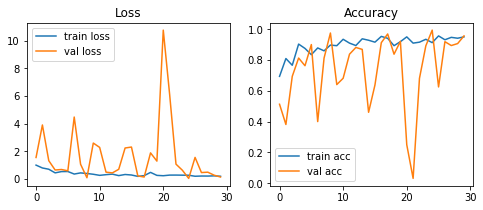

In [54]:
## Plotting Accuracy
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
train_loss = plt.plot(hist1['loss'], label='train loss')
val_loss = plt.plot(hist1['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')

plt.subplot(1,2,2)
train_loss = plt.plot(hist1['acc'], label='train acc')
val_loss = plt.plot(hist1['val_acc'], label='val acc')
plt.legend()
plt.title('Accuracy')

## Learning Rate Scheduler

In [55]:
model = inception_tl(nb_classes=10, freez_wts=False)
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=adam)

In [56]:
nb_epochs = 30
init_lr = 0.001
min_lr = 0.000001
f = 10**(np.log10(min_lr/init_lr)/float(nb_epochs))

def poly_decay(epoch):
    ''' This function takes the current epoch as input and return the updated learning rate.
        The learning rate is multiplied by a factor 'f' after each epoch.
        In the first epoch, learning rate is set to 'init_lr'.
        By the end of 'nb_epochs' the learning rate is reduced to 'min_lr' '''
    return(init_lr*(f**epoch))

# ModelCheckpoint monitors the 'val_loss' and saves the model graph and weights at the epoch with least 'val_loss'
# 'save_weights_only'=True, saves only the weights
# 'save_weights_only'=False, saves the weights and the graph
chkp = ModelCheckpoint(filepath='inception_dd.h5', monitor='val_loss', save_best_only=True, save_weights_only=False, verbose=0)
lr_schedule = LearningRateScheduler(poly_decay)

Text(0.5, 1.0, 'Learning Rate over Epochs')

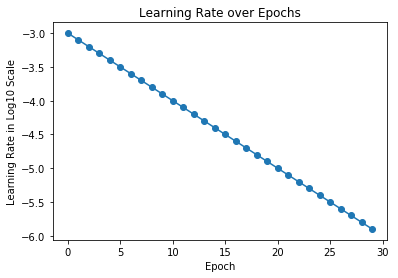

In [57]:
## plotting learning Rate vs epochs
lr_list = [poly_decay(i) for i in range(nb_epochs)]
plt.scatter(range(nb_epochs), np.log10(lr_list))
plt.plot(np.log10(lr_list))
plt.xlabel('Epoch')
plt.ylabel('Learning Rate in Log10 Scale')
plt.title('Learning Rate over Epochs')

In [58]:
hist = model.fit_generator(train_generator,steps_per_epoch=10,validation_steps=5, 
                           validation_data=val_generator, 
                           epochs=nb_epochs, 
                           callbacks=[chkp, lr_schedule]).history
np.savez('inception_dd_history.npz', loss=hist['loss'], acc=hist['acc'], val_loss=hist['val_loss'], val_acc=hist['val_acc'])

Epoch 1/30
10/10 [==============================] - 26s 3s/step - loss: 1.0734 - acc: 0.6906 - val_loss: 2.7426 - val_acc: 0.4437
Epoch 2/30
10/10 [==============================] - 4s 415ms/step - loss: 0.5422 - acc: 0.8500 - val_loss: 5.2121 - val_acc: 0.4604
Epoch 3/30
10/10 [==============================] - 4s 423ms/step - loss: 0.3978 - acc: 0.8719 - val_loss: 1.4930 - val_acc: 0.7312
Epoch 4/30
10/10 [==============================] - 4s 419ms/step - loss: 0.3488 - acc: 0.8750 - val_loss: 1.6676 - val_acc: 0.6937
Epoch 5/30
10/10 [==============================] - 4s 419ms/step - loss: 0.3538 - acc: 0.9094 - val_loss: 0.0420 - val_acc: 0.9875
Epoch 6/30
10/10 [==============================] - 4s 418ms/step - loss: 0.3117 - acc: 0.9125 - val_loss: 0.5072 - val_acc: 0.9062
Epoch 7/30
10/10 [==============================] - 4s 390ms/step - loss: 0.2546 - acc: 0.9306 - val_loss: 0.3049 - val_acc: 0.9353
Epoch 8/30
10/10 [==============================] - 4s 419ms/step - loss: 0.23

Text(0.5, 1.0, 'Accuracy')

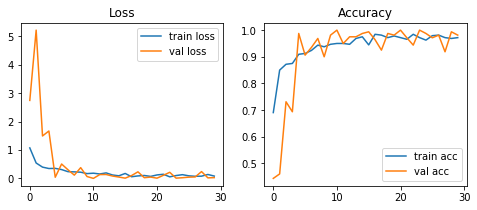

In [59]:
## Plotting Accuracy 
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
train_loss = plt.plot(hist['loss'], label='train loss')
val_loss = plt.plot(hist['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')

plt.subplot(1,2,2)
train_loss = plt.plot(hist['acc'], label='train acc')
val_loss = plt.plot(hist['val_acc'], label='val acc')
plt.legend()
plt.title('Accuracy')

## Predictions

In [60]:
#val_generator.filenames

In [61]:
len(val_generator.filenames)

747

In [62]:
val_preds = model.predict_generator(generator=val_generator,steps=len(val_generator))

In [63]:
val_preds.argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 7, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [64]:
val_preds_class = val_preds.argmax(axis=1)
val_preds_df = pd.DataFrame({'prediction':val_preds_class,'image':val_generator.filenames})


In [65]:
val_generator.class_indices

{'Airplanes': 0,
 'BACKGROUND_Google': 1,
 'Bonsai': 2,
 'Car_side': 3,
 'Faces': 4,
 'Faces_easy': 5,
 'Grand_piano': 6,
 'Leopards': 7,
 'Motorbikes': 8,
 'Watch': 9}

In [66]:
val_preds_df.head(10)

,prediction,image
0,0,Airplanes\image_0002.jpg
1,0,Airplanes\image_0003.jpg
2,0,Airplanes\image_0004.jpg
3,0,Airplanes\image_0006.jpg
4,0,Airplanes\image_0015.jpg
5,0,Airplanes\image_0020.jpg
6,0,Airplanes\image_0031.jpg
7,0,Airplanes\image_0032.jpg
8,0,Airplanes\image_0038.jpg
9,0,Airplanes\image_0040.jpg


In [67]:
val_preds_df.tail(10)

,prediction,image
737,0,Watch\image_0195.jpg
738,0,Watch\image_0200.jpg
739,0,Watch\image_0208.jpg
740,0,Watch\image_0214.jpg
741,0,Watch\image_0221.jpg
742,0,Watch\image_0224.jpg
743,0,Watch\image_0225.jpg
744,0,Watch\image_0232.jpg
745,0,Watch\image_0235.jpg
746,0,Watch\image_0238.jpg


In [68]:
test_path = 'E:\\7321 - CUTE\\10_categories\\test'

In [69]:
test_datagen = ImageDataGenerator(rescale=1./255.,
                                    rotation_range=20,
                                    height_shift_range=0.2,
                                    zoom_range=0.2)
test_generator = train_datagen.flow_from_directory(directory=test_path, 
                                                    class_mode='categorical', 
                                                     target_size=(160,160))

Found 1 images belonging to 1 classes.


In [70]:
test_generator.filenames

['test\\test_image-1551435475921.jpg']

In [71]:
predict_test=model.predict_generator(test_generator,steps=np.ceil(1/64.0))

In [72]:
predict_test

array([[3.4177379e-04, 9.9460053e-01, 6.5499707e-04, 9.1977425e-05,
        5.0197239e-04, 3.2688008e-04, 1.0263348e-03, 2.2420313e-04,
        1.7233775e-03, 5.0785532e-04]], dtype=float32)

In [73]:
np.set_printoptions(formatter={"float_kind":"{:f}".format})
predict_test
prediction=pd.DataFrame(predict_test,columns=[classes])
prediction

,Airplanes,BACKGROUND_Google,Bonsai,Car_side,Faces,Faces_easy,Grand_piano,Leopards,Motorbikes,Watch
0,0.000342,0.994601,0.000655,0.000092,0.000502,0.000327,0.001026,0.000224,0.001723,0.000508


In [74]:
prediction["maximum"]=prediction.idxmax(axis=1)
prediction

,Airplanes,BACKGROUND_Google,Bonsai,Car_side,Faces,Faces_easy,Grand_piano,Leopards,Motorbikes,Watch,maximum
0,0.000342,0.994601,0.000655,0.000092,0.000502,0.000327,0.001026,0.000224,0.001723,0.000508,"(BACKGROUND_Google,)"


In [75]:
val_generator.class_indices

{'Airplanes': 0,
 'BACKGROUND_Google': 1,
 'Bonsai': 2,
 'Car_side': 3,
 'Faces': 4,
 'Faces_easy': 5,
 'Grand_piano': 6,
 'Leopards': 7,
 'Motorbikes': 8,
 'Watch': 9}

In [76]:
pd.DataFrame(classes)

,0
0,Airplanes
1,BACKGROUND_Google
2,Bonsai
3,Car_side
4,Faces
5,Faces_easy
6,Grand_piano
7,Leopards
8,Motorbikes
9,Watch
